# Data Wrangling Project - We Rate Dogs Twitter Data

In [2444]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Gather

#### 1. Enhanced Twitter Archive

In [ ]:
# Reading the twitter-archive-enhanced file and storing it under variable df_twitter_archive
df_twitter_archive = pd.read_csv('C:/Users/Terhi/Desktop/Udacity/Data_Analytics/Project-4-data-wrangling/project/twitter-archive-enhanced.csv')

In [ ]:
# Confirming the results
df_twitter_archive.head(2)

#### 2. Image Predictions File

In [ ]:
# creating a folder image_predictions if it does not exist already
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Using request library to access the image-predictions file programmatically and storing it under variable response   
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

> The response code is 200 which means that the request has succeeded 

In [ ]:
# Checking the contents of the image_pred
response.content

In [ ]:
# Writing the contents of the file into the 'image_predictions' folder 
with open(os.path.join(folder_name, 
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

**Source:** [Udacity, Gathering Data](https://classroom.udacity.com/nanodegrees/nd002/parts/af503f34-9646-4795-a916-190ebc82cb4a/modules/aef902cd-59a3-4cd2-af74-2d39b4b03b80/lessons/96402d84-c99d-4982-9edf-2430ef30d222/concepts/ed908f34-ce67-44c0-acb1-d81abd5d9e37)

In [ ]:
# checking the file contents
os.listdir(folder_name)

In [ ]:
# Reading the tsv file in pandas dataframe and storing it under variable 'df_image_predictions'
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
# Confirming results
df_image_predictions.head(2)

#### 3. Additional data from Twitter's API

In [ ]:
# Checking the df_twitter_archive dataframe 
df_twitter_archive.head(2)

In [ ]:
# Extracting the tweet_ids in the df_twitter_archive dataframe
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

In [ ]:
# Checking the information for the first tweet id in the list
tweet = api.get_status(tweet_id_list[0])
print(tweet)

In [ ]:
# Importing the necessary libraries

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# The keys are hidden to comply with Twitter's API T's and C's

consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Create a list of Tweet IDs from df_twitter_archive to be used for gathering additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive using the created list tweet_ids
count = 0
fails_dict = {}
start = timer()
# Writing the returned JSON to a tweet_json text file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
# Calculating the time to execute the query
        end = timer()
print(end - start)
print(fails_dict)

**Source:** [Udacity, Resources](https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py)

In [ ]:
# Reading the tweet_json file and storing the values in a dataframe tweet_selected_attr
selected_attr = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count'],
                             'timestamp': json_data['created_at']})
tweet_selected_attr = pd.DataFrame(selected_attr, columns=['tweet_id','favorites','retweets','timestamp'])

In [ ]:
# Checking the number of failed tweet_ids 
print('The number of queries that returned error is', len(fails_dict))

In [1364]:
# Confirming the results
tweet_selected_attr.head(2)

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,35813,7586,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,30921,5622,Tue Aug 01 00:17:27 +0000 2017


**Source:** [Udacity, Knowledge](https://knowledge.udacity.com/questions/296525)

## Assess


In the assessing phase of the project the data is visually and programmatically assessed for; 
1.	Quality issues, which are also called as dirty data. These are content issues like inaccurate, missing, or duplicated data in a dataset
2.	Tidiness issues, which is also called as messy data. These are structural issues in the dataset that make the analysis harder. 


#### Twitter Archive

##### Visual Assessment

In [1365]:
# Displaying the entire df_twitter_archive table 
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


There are 2356 rows and 17 columns in the dataframe. The colums are:

- **tweet_id:** the user's unique identification number
- **in_reply_to_status_id:** If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- **in_reply_to_user_id:** If the represented Tweet is a reply, this field will contain the string representation of the original Tweet’s ID
- **timestamp:** the timestamp when the Tweet was posted
- **source:** Utility used to post the Tweet
- **text:**The Tweet text
- **retweeted_status_id:** The unique identifier for the original Tweet if this is a retweet
- **retweeted_status_timestamp:** The timestamp of the retweet
- **expanded_urls:** An expanded version of display_url. Links to the media display page
- **rating_numerator:** The numerator (the top number of a fraction) of the WeRateDogs rating system (almost always higher than 10)
- **rating_denominator:** The denominator (the bottom number of a fraction, which is 10) of the WeRateDogs rating system
- **name:** Dog's name
- **doggo:** One of the various stages of dog created by WeRateDogs. The [Dogtionary for the criteria](https://classroom.udacity.com/nanodegrees/nd002/parts/af503f34-9646-4795-a916-190ebc82cb4a/modules/14d9f5f1-9e7b-4bfb-97f3-bcdbf4a3699c/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/28d4643b-3785-4700-bdee-4e5fc9963576)
- **floofer:** One of the various stages of dog created by WeRateDogs 
- **pupper:** One of the various stages of dog created by WeRateDogs
- **puppo:** One of the various stages of dog created by WeRateDogs


**Source:** [Twitter.com](https://help.twitter.com/en/using-twitter/retweet-faqs)

##### Programmatic Assessment

In [1366]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are altogether 2356 Tweets wherefrom 181 are retweets and 78 are replies.

In [1367]:
df_twitter_archive.groupby('name').sum().sort_index()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
name,,,,,,,
Abby,1.491722e+18,0.0,0.0,0.000000e+00,0.000000e+00,21.0,20.0
Ace,7.532945e+17,0.0,0.0,0.000000e+00,0.000000e+00,11.0,10.0
Acro,6.740193e+17,0.0,0.0,0.000000e+00,0.000000e+00,10.0,10.0
Adele,7.059751e+17,0.0,0.0,0.000000e+00,0.000000e+00,10.0,10.0
Aiden,6.740144e+17,0.0,0.0,0.000000e+00,0.000000e+00,11.0,10.0
...,...,...,...,...,...,...,...
such,8.875171e+17,0.0,0.0,0.000000e+00,0.000000e+00,14.0,10.0
the,5.402458e+18,0.0,0.0,0.000000e+00,0.000000e+00,83.0,80.0
this,7.311560e+17,0.0,0.0,0.000000e+00,0.000000e+00,204.0,170.0


In [1368]:
df_twitter_archive['name'].tolist()

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

In [1369]:
# Checking the name "O". The text confirms the correct name is O'Malley
df_twitter_archive.query('name == "O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [1370]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1371]:
# Checking the unique values of rating denominators
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [1372]:
df_twitter_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [1373]:
# Checking the range of the rating numerators and counting how many values per rate
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [1374]:
# Checking the Tweets that have rating numerator higher than 15
df_twitter_archive.query('rating_numerator > 15')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


#### Image Predictions 

##### Visual Assessment

In [1375]:
# Display the df_image_predictions table
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


There are 2075 rows and 12 columns in the dataframe and the columns are:
- **tweet_id:** the user's unique identification number
- **jpg_url:** the url of the image
- **img_num:** the number of images available (from 1 to 4)
- **p1:** the algorithm's #1 prediction for the image in the tweet 
- **p1_conf:** how confident the algorithm is in its #1 prediction 
- **p1_dog:** whether or not the #1 prediction is a breed of dog
- **p2:** the algorithm's second most likely prediction
- **p2_conf:** how confident the algorithm is in its #2 prediction
- **p2_dog:** whether or not the #2 prediction is a breed of dog
- **p3:** the algorithm's second most likely prediction
- **p3_conf:** how confident the algorithm is in its #3 prediction
- **p3_dog:** whether or not the #3 prediction is a breed of dog

**Source:** [Udacity, Project Motivation](https://classroom.udacity.com/nanodegrees/nd002/parts/af503f34-9646-4795-a916-190ebc82cb4a/modules/14d9f5f1-9e7b-4bfb-97f3-bcdbf4a3699c/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/28d4643b-3785-4700-bdee-4e5fc9963576)

##### Programmatic Assesment

In [1376]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1377]:
# Checking if there are duplicated jpg.urls in the dataframe.
df_image_predictions.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [1378]:
# Checking if there are duplicated tweet_ids in the dataframe.
df_image_predictions.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

All tweet_ids have images assigned to them, and there are no duplicate tweet_ids. However 66 of the image URLs are duplicated. It is however possible that some of these are retweets, so we will recheck this in a later stage when the dataframes are merged into a master_df. 

In [1379]:
df_image_predictions[df_image_predictions.duplicated(['jpg_url'], keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


In [1380]:
df_image_predictions.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [1381]:
df_twitter_archive.tweet_id.count() - df_image_predictions.tweet_id.count()

281

324 predictions of the Tweets' images are wrongly predicted to something else than a dog. Additionally, in the df_twitter_archive there are 2356 rows and in df_image_predictions there are 2075 rows, which means that 281 Tweets are missing images in the df_twitter_archive dataframe.

#### Additional data from Twitter's API

##### Visual Assessment

In [1382]:
# Displaying the entire tweet_selected_attr table
tweet_selected_attr

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,35813,7586,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,30921,5622,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,23265,3720,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,39091,7766,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,37342,8361,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2323,666049248165822465,96,40,Mon Nov 16 00:24:50 +0000 2015
2324,666044226329800704,267,130,Mon Nov 16 00:04:52 +0000 2015
2325,666033412701032449,111,41,Sun Nov 15 23:21:54 +0000 2015
2326,666029285002620928,120,42,Sun Nov 15 23:05:30 +0000 2015


There are 2328 rows and 4 columns in the dataframe. The colums are:
- tweet_id: the user's unique identification number
- favorite: number of times the the tweet was 'liked'
- retweets: number of times the Tweet was re-posted
- timestamp: the timestamp when the Tweet was posted

##### Programmatic Assessment

In [1383]:
# Checking the summary of the dataframe tweet_selected_attr
tweet_selected_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2328 non-null   int64 
 1   favorites  2328 non-null   int64 
 2   retweets   2328 non-null   int64 
 3   timestamp  2328 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [1384]:
df_twitter_archive.tweet_id.count() - tweet_selected_attr.tweet_id.count()

28

The tweet_selected_attr dataframe has 2328 rows, and the original df_twitter_archive has 2356 rows. The difference is number of tweet_ids that returned errors in the Twitter API query. 

In [1385]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Quality

##### Twitter Archive

- The data includes retweets and not only original tweets with ratings – need to remove the items that have retweeted_status_id is non_null. There are 181 retweets and 78 replies that re not needed in the dataframe
- Timestamp is object instead of datetime
- Names of the dogs are not complete or have unexpected values such as ‘such’, ‘the’, ‘this’, ‘very’, ‘unacceptable’, etc.  these non-dog names are in lowercase and proper dog names are capitalized. Name 'O' is incorrect and the correct name is O'Malley. There are also values 'None' that should be replaced by 'Nan'
- Some rating_denominator values are not valid. Should be 10, and if higher it could be a total rating of a group of dogs, or wrongly extracted data
- Some rating_numerator values are not correct. Rating numerators should generally not be higher than 14, although according to WeRateDogs there are some cases with ratings like 420/10, 1776/10, and 666/10 [WeRateDogs](https://twitter.com/dog_rates/status/912103168309432320?lang=en)
- Datatype of rating_denominator should be float
- Datatype of rating_numerator should be float
- As we will not use the tweet_id column to mathematical calculations this should be object instead an integer
- Change the Dogtionary (doggo, floofer, pupper, puppo) ‘None’ values to NaN
- There are unnecessary columns that are not needed for the analysis, such as: expanded_url and source

##### Image Predictions 
- 324 predictions of the Tweets' images are wrongly predicted to something else than a dog. tweet_id 892420643555336193 for example has as predictions are orange, bagel and a banana
- The tweet_id column is an integer and not object
- There are 2075 rows in this dataframe, and 2356 in the df_twitter_archive. This means that 281 tweets are missing images
- 66 of the image URLs are duplicated, however, it is possible that some of these are retweets, so we will recheck this in a later stage when the dataframes are merged into a master_df
- Not all predictions are in same format, some are capitalized, some not

##### Additional data from Twitter's API
- Timestamp is object instead of datetime
- There are 2328 rows in the dataframe, which is 28 less than the original ‘df_twitter_archive’ has. This is be because of the errors returned in querying the data from Twitter’s API  
- The tweet_id column is an integer and not object


### Tidiness

##### Twitter Archive
- Doggo, loofer, pupper and puppo are one observation and should be one column instead of 4 different columns. 
- In order to use the rating denominator and the numerator in the analysis, we need to have the one observation in one column instead of 2.
- Delete unnecessary columns that are not needed for the analysis, such as: expanded_url and source

##### Image Predictions 
- There are 3 predictions, however only 1, the best prediction regarding the confidence and the match of being a dog, should be enough for the purpose of the analysis. The priority order is as p1 is greater than p2, and p2 is greater than p3

##### All 3 dataframes
- Tidy data says that one observation unit should belong to a single table. The three tables represent the same kind observation, so, they belong in a single table

## Clean
In the cleaning phase of this project we will clean each of the issues documented assessment phase resulting into a high quality and tidy master_df pandas DataFrame.

In [2352]:
# Creating backup copies of the 3 datasets
archive_clean = df_twitter_archive.copy()
image_clean = df_image_predictions.copy()
tweet_clean = tweet_selected_attr.copy()

In [2353]:
# confirming results
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [2354]:
# confirming results
image_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [2355]:
# confirming results
tweet_clean.head(1)

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,35813,7586,Tue Aug 01 16:23:56 +0000 2017


In [2356]:
# Storing the clean DataFrames in CSV files with the main one named twitter_archive_master.csv
archive_clean.to_csv('archive_clean.csv', index = False, header = True)
image_clean.to_csv('image_clean.csv', index = False, header = True)
tweet_clean.to_csv('tweet_clean.csv', index = False, header = True)

#### Define

##### (1) Merge the 3 dataframes into one master_df

#### Code

In [2357]:
# Merge tweet_clean and archive clean using inner join so that the master_df only contains the rows that have matching values in both of the original DataFrames.
# This will remove the 28 Tweets that do not have the additional attributes queried from Twitter's API 
master_df = pd.merge(left=tweet_clean, right=archive_clean, left_on='tweet_id', right_on='tweet_id')

In [2358]:
# Merge master_df and image_clean using inner join so that the master_df only contains the rows that have matching values in both of the DataFrames.
# This will remove the 281 Tweets that are missing images
master_df = pd.merge(left=master_df, right=image_clean, left_on='tweet_id', right_on='tweet_id')

#### Test

In [2359]:
# Confirming the results
master_df.head()

,tweet_id,favorites,retweets,timestamp_x,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,35813,7586,Tue Aug 01 16:23:56 +0000 2017,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,30921,5622,Tue Aug 01 00:17:27 +0000 2017,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,23265,3720,Mon Jul 31 00:18:03 +0000 2017,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,39091,7766,Sun Jul 30 15:58:51 +0000 2017,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,37342,8361,Sat Jul 29 16:00:24 +0000 2017,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [2360]:
# Checking that we have favorites, retweets, and images for all the tweet_ids
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2056 non-null   int64  
 1   favorites                   2056 non-null   int64  
 2   retweets                    2056 non-null   int64  
 3   timestamp_x                 2056 non-null   object 
 4   in_reply_to_status_id       23 non-null     float64
 5   in_reply_to_user_id         23 non-null     float64
 6   timestamp_y                 2056 non-null   object 
 7   source                      2056 non-null   object 
 8   text                        2056 non-null   object 
 9   retweeted_status_id         72 non-null     float64
 10  retweeted_status_user_id    72 non-null     float64
 11  retweeted_status_timestamp  72 non-null     object 
 12  expanded_urls               2056 non-null   object 
 13  rating_numerator            2056 

#### Define

##### (2) Remove the retweeted items from the dataset by removing the lines with retweeted_status_id non_null (after the merge there are 72 retweets)

#### Code

In [2361]:
master_df = master_df[master_df.retweeted_status_id.isnull()]

#### Test

In [2362]:
# Checking the number of unique retweeted_status_id values.  
master_df.retweeted_status_id.unique()
# This results to an array of NaN value, which confirms that all the retweets have been deleted.

array([nan])

In [2363]:
# There were 2056 rows before the deletion, and now there is 1984 rows, resulting to 72 rows deleted, which was the count of 
# the retweeted_status_ids before dropping the lines.  This also confirms that all the retweets have been deleted.
2056 - 1984

72

#### Define

##### (3) Remove the replies from the dataset by removing the lines with in_reply_to_status_id non_null (now 23 after the merge)

#### Code

In [2364]:
# Checking the number tweet_ids that are replies
master_df[master_df.in_reply_to_status_id.notnull()].tweet_id.count()

23

In [2365]:
# Removing the replies by storing only the null values into master_df
master_df = master_df[master_df.in_reply_to_status_id.isnull()]

#### Test

In [2366]:
# Confirming the results by checking the number of replies after storing only the null values into master_df 
master_df[master_df.in_reply_to_status_id.notnull()].tweet_id.count()

0

#### Define

##### (4) Change the timestamp datatype to datetime instead of object and  rename the timestamp_x to timestamp. 

#### Code

In [2367]:
# Changing the datatype to datetime
master_df['timestamp_x']=pd.to_datetime(master_df['timestamp_x'])

In [2368]:
# Renaming the column to timestamp instead of timestamp_x
master_df.rename(columns={'timestamp_x':'timestamp'}, inplace=True)

#### Test

In [2369]:
#confirming the results
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2055
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1961 non-null   int64              
 1   favorites                   1961 non-null   int64              
 2   retweets                    1961 non-null   int64              
 3   timestamp                   1961 non-null   datetime64[ns, UTC]
 4   in_reply_to_status_id       0 non-null      float64            
 5   in_reply_to_user_id         0 non-null      float64            
 6   timestamp_y                 1961 non-null   object             
 7   source                      1961 non-null   object             
 8   text                        1961 non-null   object             
 9   retweeted_status_id         0 non-null      float64            
 10  retweeted_status_user_id    0 non-null      float64         

#### Define

##### (5) Change the datatypes of
- tweet_id column to an integer instead of object
- rating_numerator to float
- rating_denominator to float

#### Code

In [2370]:
master_df['tweet_id'] = master_df['tweet_id'].astype(str)
master_df['rating_numerator'] = master_df['rating_numerator'].astype(float)
master_df['rating_denominator'] = master_df['rating_denominator'].astype(float)

#### Test

In [2371]:
# Confirming the results
master_df.info()
# Datatypes have been changed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2055
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1961 non-null   object             
 1   favorites                   1961 non-null   int64              
 2   retweets                    1961 non-null   int64              
 3   timestamp                   1961 non-null   datetime64[ns, UTC]
 4   in_reply_to_status_id       0 non-null      float64            
 5   in_reply_to_user_id         0 non-null      float64            
 6   timestamp_y                 1961 non-null   object             
 7   source                      1961 non-null   object             
 8   text                        1961 non-null   object             
 9   retweeted_status_id         0 non-null      float64            
 10  retweeted_status_user_id    0 non-null      float64         

#### Define

##### (6) Replace the dog names that are not complete or are invalid (ones in lower case) by 'NaN', and also 'None' values by 'NaN', and "O" with correct name  O'Malley.

#### Code

In [2372]:
# Checking again the list of dog names in the dataset
master_df.name.tolist()

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'Cash',
 'Jed',
 'None',
 'Sebastian',
 'None',
 'Sierra',
 'None',
 'None',
 'Monkey',
 'None',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'None',
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',
 'Walter'

In [2373]:
# Checking how many values are in lower case, and therefore not real dog names
master_df.name.str.islower().value_counts()
# There are 98 lines that are in lower case, non dog names

False    1863
True       98
Name: name, dtype: int64

In [2374]:
# Replacing all strings in lowercase in name column with 'NaN' by using mask with ^[a-z]+$ as regular expression
master_df['name'] = master_df.name.mask(master_df.name.str.match(r'^[a-z]+$'))

**Source:** [stackoverflow](https://stackoverflow.com/questions/50633935/pandas-replace-all-strings-in-lowercase-in-a-column-with-none)

In [2375]:
# Checking the number of names that have value "None". There are 523 of them.  
master_df.query('name == "None"').count()[0]

523

In [2376]:
# Replacing the "None" values in name column with 'NaN'
master_df['name'] = master_df.name.replace('None', np.nan)

In [2377]:
master_df.query('name == "O"')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
613,776201521193218049,9634,2520,2016-09-14 23:30:38+00:00,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,...,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True


In [2378]:
# Replacing the "O" name with O'Malley
master_df['name'] = master_df.name.replace('O', 'Omalley')

#### Test

In [2379]:
# Checking the number of null values in the name column, which confirms that 
# the lower case non-dog names and 'None' values have been replaced by 'Nan'
master_df.name.isnull().value_counts()

False    1340
True      621
Name: name, dtype: int64

In [2380]:
# Checking again the number of names that have value "None" to make sure they have been replaced.
master_df.query('name == "None"').count()[0]
# the value is zero that confirms all "None" values have been replaced

0

In [2381]:
# Confirming that 'O' has been changed to Omalley
master_df.query('name == "Omalley"')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
613,776201521193218049,9634,2520,2016-09-14 23:30:38+00:00,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,...,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True


In [2382]:
# Checking again the list of names to confirm the lower case non-dog names and 'None' values have been replaced by 'Nan'
master_df.name.tolist()

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 nan,
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 nan,
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 nan,
 'Canela',
 nan,
 nan,
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 nan,
 'Earl',
 'Lola',
 'Kevin',
 nan,
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 nan,
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 nan,
 'Elliot',
 'Louis',
 nan,
 'Bella',
 'Jesse',
 nan,
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 nan,
 'Cash',
 'Jed',
 nan,
 'Sebastian',
 nan,
 'Sierra',
 nan,
 nan,
 'Monkey',
 nan,
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 nan,
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',
 'Walter',
 nan,
 'Cooper',
 nan,
 'Harold',
 'Shikha',
 nan,
 

#### Define

##### (7) Change the incorrect rating_denominators and numerators to match the text

#### Code

In [2383]:
# Re-investigating the Tweets with rating numerators above 15 after the merge to master_df
master_df.query('rating_numerator > 15')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
336,820690176645140481,12261,3234,2017-01-15 17:52:40+00:00,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,...,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
406,810984652412424192,5376,1451,2016-12-19 23:06:23+00:00,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
548,786709082849828864,18366,6158,2016-10-13 23:23:56+00:00,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
603,778027034220126208,6565,1613,2016-09-20 00:24:34+00:00,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
721,758467244762497024,4758,2193,2016-07-28 01:00:57+00:00,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
788,749981277374128128,5085,2434,2016-07-04 15:00:45+00:00,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,...,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
910,731156023742988288,3767,1243,2016-05-13 16:15:54+00:00,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,...,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
987,716439118184652801,2334,204,2016-04-03 01:36:11+00:00,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1008,713900603437621249,2776,725,2016-03-27 01:29:02+00:00,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,...,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
1033,710658690886586372,2263,548,2016-03-18 02:46:49+00:00,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,...,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True


In [2384]:
# Re-checking the text related to the Tweets with rating numerator above 15
master_df.query('rating_numerator > 15').text.tolist()

['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
 "Happy S

In [2385]:
# Re-checking the Tweets with rating denominators that are other than 10
master_df.query('rating_denominator != 10')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
336,820690176645140481,12261,3234,2017-01-15 17:52:40+00:00,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,...,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
406,810984652412424192,5376,1451,2016-12-19 23:06:23+00:00,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
721,758467244762497024,4758,2193,2016-07-28 01:00:57+00:00,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
862,740373189193256964,34550,13105,2016-06-08 02:41:38+00:00,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
910,731156023742988288,3767,1243,2016-05-13 16:15:54+00:00,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,...,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
953,722974582966214656,4030,1532,2016-04-21 02:25:47+00:00,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
987,716439118184652801,2334,204,2016-04-03 01:36:11+00:00,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1008,713900603437621249,2776,725,2016-03-27 01:29:02+00:00,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,...,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
1033,710658690886586372,2263,548,2016-03-18 02:46:49+00:00,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,...,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
1051,709198395643068416,2395,633,2016-03-14 02:04:08+00:00,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,...,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True


In [2386]:
# Checking the text related to the Tweets with rating denominators that are other than 10
master_df.query('rating_denominator != 10').text.tolist()

['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
 "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
 "Here's a brigade of puppers. All look very prepared for whatever happens next

In [2387]:
# Change tweet_id 786709082849828864 to 9.75 / 10
master_df.at[548, 'rating_numerator'] = 9.75
# Change tweet_id 778027034220126208 to 11.27/10
master_df.at[603, 'rating_numerator'] = 11.27
# Change tweet_id 810984652412424192 to ‘Nan’ as has no rating
master_df.at[406, 'rating_numerator'] = np.nan
master_df.at[406, 'rating_denominator'] = np.nan
# Change tweet_id 716439118184652801 to 11/10
master_df.at[987, 'rating_numerator'] = 11
master_df.at[987, 'rating_denominator'] = 10
# Change tweet_id 680494726643068929 to 11.26/10
master_df.at[1437, 'rating_numerator'] = 11.26
# Change tweet_id 740373189193256964 to  14/10
master_df.at[862, 'rating_numerator'] = 14
master_df.at[862, 'rating_denominator'] = 10
# Change tweet_id 722974582966214656 to 13/10
master_df.at[953, 'rating_numerator'] = 13
master_df.at[953, 'rating_denominator'] = 10
# Change tweet_id 682962037429899265 to 10/10
master_df.at[1391, 'rating_numerator'] = 10
master_df.at[1391, 'rating_denominator'] = 10
# Change tweet_id 666287406224695296 to 9/10
master_df.at[2035, 'rating_numerator'] = 9
master_df.at[2035, 'rating_denominator'] = 10
# The rest of the ratings are group ratings with more than 1 dog in the image and are OK as they are

#### Test

In [2388]:
# Confirming results
master_df.query('tweet_id == "786709082849828864"')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
548,786709082849828864,18366,6158,2016-10-13 23:23:56+00:00,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True


In [2389]:
# Confirming results
master_df.query('tweet_id == "778027034220126208"')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
603,778027034220126208,6565,1613,2016-09-20 00:24:34+00:00,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,...,1,clumber,0.946718,True,cocker_spaniel,0.01595,True,Lhasa,0.006519,True


In [2390]:
# Confirming results
master_df.query('tweet_id == "810984652412424192"')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
406,810984652412424192,5376,1451,2016-12-19 23:06:23+00:00,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


In [2391]:
# Confirming results
master_df.query('tweet_id == "716439118184652801"')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
987,716439118184652801,2334,204,2016-04-03 01:36:11+00:00,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True


In [2392]:
# Confirming results
master_df.query('tweet_id == "680494726643068929"')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1437,680494726643068929,1685,477,2015-12-25 21:06:00+00:00,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [2393]:
# Confirming results
master_df.query('tweet_id == "740373189193256964"')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
862,740373189193256964,34550,13105,2016-06-08 02:41:38+00:00,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True


In [2394]:
# Confirming results
master_df.query('tweet_id == "722974582966214656"')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
953,722974582966214656,4030,1532,2016-04-21 02:25:47+00:00,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True


In [2395]:
# Confirming results
master_df.query('tweet_id == "682962037429899265"')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1391,682962037429899265,36205,16212,2016-01-01 16:30:13+00:00,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,...,1,dingo,0.2786,False,Chihuahua,0.155207,True,loupe,0.153598,False


In [2396]:
# Confirming results
master_df.query('tweet_id == "666287406224695296"')

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2035,666287406224695296,135,60,2015-11-16 16:11:11+00:00,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,...,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [2397]:
# Checking again the list of text for denominators that are not 10. The rest of the not 10 ratings are groups of dogs
master_df.query('rating_denominator != 10').text.tolist()

['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
 "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12",
 'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK',
 "Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa",
 "Happy Wednesday here's a bucket of pups. 44/40 would pet all a

In [2398]:
# Checking again the list of text for numerators above 15. The rest of the above 15 ratings are groups of dogs or outliers
# or can be concidered as outliers such as Atticus who got rating 1776/10
master_df.query('rating_numerator > 15').text.tolist()

['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
 "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12",
 'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK',
 "Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa",
 "Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ",
 'Someone help the girl is being mugged. Several are distr

#### Define

##### (8) Convert the rating_denominator and numerator into 1 column, from fraction to a decimal, by dividing the numerator by the denominator.

#### Code

In [2399]:
master_df['rating'] = master_df['rating_numerator']/master_df['rating_denominator']

#### Test

In [2400]:
# confirming the results
master_df.head()

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,35813,7586,2017-08-01 16:23:56+00:00,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,892177421306343426,30921,5622,2017-08-01 00:17:27+00:00,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
2,891815181378084864,23265,3720,2017-07-31 00:18:03+00:00,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,39091,7766,2017-07-30 15:58:51+00:00,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,37342,8361,2017-07-29 16:00:24+00:00,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2


In [2401]:
# Checking the new range of different ratings in the dataset
master_df.rating.value_counts()

1.200      448
1.000      418
1.100      397
1.300      249
0.900      150
0.800       95
0.700       51
1.400       34
0.500       33
0.600       32
0.300       19
0.400       15
0.200        9
0.100        4
1.127        1
1.126        1
0.975        1
42.000       1
0.000        1
177.600      1
Name: rating, dtype: int64

In [2402]:
# Confirming results
master_df.head(2)

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,35813,7586,2017-08-01 16:23:56+00:00,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,892177421306343426,30921,5622,2017-08-01 00:17:27+00:00,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3


#### Define

#### (9) Keep only 1 column for image prediction and 1 column for the prediction confidence choosing the best available prediction result. The priority order is as p1 is most important, p2 second most important, and p3 the least important.
Change the the 324 lines without image prediction (predictions file) to 'Nan'


#### Code

In [2403]:
# create empty lists for prediction and pred_confidence where the correct prediction and the confidence level will be stored
prediction = []
pred_confidence = []

# Creating a funtion to find and store the first available correct prediction (P1_dog, P2_dog, or p3_dog is true)
# in the above created variables. If all the 3 predictions are false, return programmable none, 'NaN'
def i(master_df):
    if master_df.p1_dog==True:
        prediction.append(master_df.p1)
        pred_confidence.append(master_df.p1_conf)
    elif master_df.p2_dog==True:
        prediction.append(master_df.p2)
        pred_confidence.append(master_df.p2_conf)
    elif master_df.p3_dog==True:
        prediction.append(master_df.p3)
        pred_confidence.append(master_df.p3_conf)
    else:
        prediction.append(np.nan)
        pred_confidence.append(np.nan)
        
# apply the function to defined master_df column
master_df.apply(i, axis = 1)
# creating new columns to master_df for the created lists 
master_df['dog_breed'] = prediction
master_df['pred_confidence'] = pred_confidence

#### Test

In [2404]:
# Confirming the results by checking sample of 5 rows
master_df.sample(5)

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,dog_breed,pred_confidence
1775,671115716440031232,1298,731,2015-11-29 23:57:10+00:00,NaN,NaN,2015-11-29 23:57:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Phred. He isn't steering, looking at the ...",NaN,...,True,kelpie,0.143366,True,dingo,0.129802,False,0.6,malinois,0.406341
1395,682662431982772225,3009,1058,2015-12-31 20:39:41+00:00,NaN,NaN,2015-12-31 20:39:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Joey and Izzy. Joey only has one ear that...,NaN,...,True,Cardigan,0.263553,True,basset,0.167618,True,1.1,beagle,0.413824
1546,676146341966438401,1855,637,2015-12-13 21:07:04+00:00,NaN,NaN,2015-12-13 21:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bert. He likes flowers. 10/10 https://...,NaN,...,True,standard_poodle,0.284121,True,greenhouse,0.034868,False,1.0,Irish_water_spaniel,0.388332
1763,671186162933985280,697,196,2015-11-30 04:37:05+00:00,NaN,NaN,2015-11-30 04:37:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sparky. That's his pancake now. He wil...,NaN,...,True,whippet,0.169134,True,toy_terrier,0.125815,True,1.0,Chihuahua,0.319106
1550,675898130735476737,1557,554,2015-12-13 04:40:46+00:00,NaN,NaN,2015-12-13 04:40:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm sure you've all seen this pupper. Not prep...,NaN,...,True,malinois,0.077037,True,pug,0.074597,True,1.0,Labrador_retriever,0.407430


In [2405]:
master_df.head()

,tweet_id,favorites,retweets,timestamp,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,dog_breed,pred_confidence
0,892420643555336193,35813,7586,2017-08-01 16:23:56+00:00,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,...,False,bagel,0.085851,False,banana,0.076110,False,1.3,NaN,NaN
1,892177421306343426,30921,5622,2017-08-01 00:17:27+00:00,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,...,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3,Chihuahua,0.323581
2,891815181378084864,23265,3720,2017-07-31 00:18:03+00:00,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,...,True,malamute,0.078253,True,kelpie,0.031379,True,1.2,Chihuahua,0.716012
3,891689557279858688,39091,7766,2017-07-30 15:58:51+00:00,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3,Labrador_retriever,0.168086
4,891327558926688256,37342,8361,2017-07-29 16:00:24+00:00,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2,basset,0.555712


In [2406]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2055
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1961 non-null   object             
 1   favorites                   1961 non-null   int64              
 2   retweets                    1961 non-null   int64              
 3   timestamp                   1961 non-null   datetime64[ns, UTC]
 4   in_reply_to_status_id       0 non-null      float64            
 5   in_reply_to_user_id         0 non-null      float64            
 6   timestamp_y                 1961 non-null   object             
 7   source                      1961 non-null   object             
 8   text                        1961 non-null   object             
 9   retweeted_status_id         0 non-null      float64            
 10  retweeted_status_user_id    0 non-null      float64         

#### Define

##### (10) Clean the dog breeds column that values have a consistent style. Replace the _ with space and capitalize first letter of each word

#### Code

In [2407]:
# Replacing the _ with space
master_df['dog_breed'] = master_df.dog_breed.replace('_', ' ', regex=True)
# Capitalizing the first letter of each word
master_df['dog_breed'] = master_df.dog_breed.str.title()

#### Test

In [2408]:
# Confirming the results
master_df.dog_breed.tolist()

[nan,
 'Chihuahua',
 'Chihuahua',
 'Labrador Retriever',
 'Basset',
 'Chesapeake Bay Retriever',
 'Appenzeller',
 'Pomeranian',
 'Irish Terrier',
 'Pembroke',
 'Samoyed',
 'French Bulldog',
 'Pembroke',
 'French Bulldog',
 'Golden Retriever',
 'Whippet',
 'Golden Retriever',
 'Golden Retriever',
 'Siberian Husky',
 'French Bulldog',
 'Basset',
 nan,
 'Pembroke',
 'Mexican Hairless',
 'Samoyed',
 'Chihuahua',
 'Kuvasz',
 nan,
 'French Bulldog',
 'Pug',
 'Blenheim Spaniel',
 'Pug',
 'Malamute',
 'Italian Greyhound',
 'Chow',
 'Pug',
 'Pembroke',
 'German Shepherd',
 'Doberman',
 'Golden Retriever',
 'Chow',
 'Golden Retriever',
 'Eskimo Dog',
 'Labrador Retriever',
 'Pembroke',
 'Golden Retriever',
 'Golden Retriever',
 'Weimaraner',
 'Saluki',
 'Samoyed',
 nan,
 nan,
 'Pembroke',
 'Golden Retriever',
 'Chihuahua',
 'Miniature Pinscher',
 'Basset',
 'German Short-Haired Pointer',
 'English Springer',
 'Labrador Retriever',
 nan,
 'Vizsla',
 'Italian Greyhound',
 'Basset',
 'French Bulldo

#### Define

##### (11) Delete columns that are not needed for the analysis 

#### Code

In [2409]:
# Dropping the columns 'expanded_urls', 'source','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog',
#'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
#'retweeted_status_timestamp', 'timestamp_y' as no longer needed
master_df = master_df.drop(['expanded_urls', 'source','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'timestamp_y'], axis=1)

#### Test

In [2410]:
# Confirming the results
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2055
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1961 non-null   object             
 1   favorites           1961 non-null   int64              
 2   retweets            1961 non-null   int64              
 3   timestamp           1961 non-null   datetime64[ns, UTC]
 4   text                1961 non-null   object             
 5   rating_numerator    1960 non-null   float64            
 6   rating_denominator  1960 non-null   float64            
 7   name                1340 non-null   object             
 8   doggo               1961 non-null   object             
 9   floofer             1961 non-null   object             
 10  pupper              1961 non-null   object             
 11  puppo               1961 non-null   object             
 12  jpg_url             1961 non-null 

#### Define

##### (12) Change the Dogtionary (doggo, floofer, pupper, puppo) ‘None’ values to NaN

#### Code

In [2411]:
# Checking the number of doggo in the dataset
master_df.doggo.value_counts()

None     1890
doggo      71
Name: doggo, dtype: int64

In [2412]:
# Checking the number of floofer in the dataset
master_df.floofer.value_counts()

None       1953
floofer       8
Name: floofer, dtype: int64

In [2413]:
# Checking the number of pupper in the dataset
master_df.pupper.value_counts()

None      1752
pupper     209
Name: pupper, dtype: int64

In [2414]:
master_df.puppo.value_counts()

None     1938
puppo      23
Name: puppo, dtype: int64

In [2415]:
# Replacing the 'None' values with programmable 'NaN'
master_df['doggo'] = master_df['doggo'].replace('None', np.nan)
master_df['floofer'] = master_df['floofer'].replace('None', np.nan)
master_df['pupper'] = master_df['pupper'].replace('None', np.nan)
master_df['puppo'] = master_df['puppo'].replace('None', np.nan)

#### Test

In [2416]:
# Confirming that the 'None' values have been replaced 
print(master_df.pupper.value_counts())
print(master_df.floofer.value_counts())
print(master_df.puppo.value_counts())
print(master_df.doggo.value_counts())

pupper    209
Name: pupper, dtype: int64
floofer    8
Name: floofer, dtype: int64
puppo    23
Name: puppo, dtype: int64
doggo    71
Name: doggo, dtype: int64


#### Define

##### (13) Combine the doggo, floofer, pupper and puppo to one column instead of 4 different columns,  correct the values that have 2 dog stages, and finally delete the doggo, floofer, pupper and puppo columns that are no longer needed. 

#### Code

In [2417]:
# Creating a new column 'dog_classification' with the values from doggo, floofer, pupper, and puppo columns
master_df['dog_classification'] = (master_df['doggo'].fillna('') + master_df['floofer'].fillna('') + master_df['pupper'].fillna('') + master_df['puppo'].fillna('')).replace('', np.nan)

Source: [stackoverflow](https://stackoverflow.com/questions/53393597/changing-4-columns-in-only-1)

In [2418]:
# Checking the count of different values in the dog_classification column
master_df.dog_classification.value_counts()

pupper          201
doggo            61
puppo            22
doggopupper       8
floofer           7
doggofloofer      1
doggopuppo        1
Name: dog_classification, dtype: int64

In [2419]:
# Checking the text in the doggofloofer tweet to identify what dog stage is the correct one.
master_df.query('dog_classification == "doggofloofer"').text.tolist()
# According to the text it should be changed to 'NaN' as no stage is mentioned

["At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"]

In [2420]:
# Checking the text in the doggopupper tweet to identify what dog stage is the correct one.
master_df.query('dog_classification == "doggopupper"').text.tolist()
# According to Dogtionary, doggo and pupper stages are very close to each other so we will change 
# the doggopupper values to doggo

['This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7',
 'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
 "This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj",
 "This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd",
 'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll',
 "Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8",
 'This is just downright precious af. 12/10 for both pupper and doggo htt

In [2421]:
# Checking the text in the doggopuppo tweet to identify what dog stage is the correct one.
master_df.query('dog_classification == "doggopuppo"').text.tolist()
# According to the text the dog stage should be changed to puppo

["Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"]

In [2422]:
# Changing doggofloofer to 'NaN'
master_df['dog_classification'] = master_df.dog_classification.replace('doggofloofer', np.nan)
master_df['dog_classification'] = master_df.dog_classification.replace('doggopupper', 'doggo')
master_df['dog_classification'] = master_df.dog_classification.replace('doggopuppo', 'puppo')

In [2423]:
# Deleting the no longer needed columns doggo, floofer, pupper and puppo
master_df = master_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [2424]:
# Checking again the count of different values in the dog_classification column to confirm the results
master_df.dog_classification.value_counts()

pupper     201
doggo       69
puppo       23
floofer      7
Name: dog_classification, dtype: int64

In [2425]:
# confirming the results
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2055
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1961 non-null   object             
 1   favorites           1961 non-null   int64              
 2   retweets            1961 non-null   int64              
 3   timestamp           1961 non-null   datetime64[ns, UTC]
 4   text                1961 non-null   object             
 5   rating_numerator    1960 non-null   float64            
 6   rating_denominator  1960 non-null   float64            
 7   name                1340 non-null   object             
 8   jpg_url             1961 non-null   object             
 9   img_num             1961 non-null   int64              
 10  rating              1960 non-null   float64            
 11  dog_breed           1657 non-null   object             
 12  pred_confidence     1657 non-null 

#### Define

#### (14) Check again if there are duplicated URLs in the dataframe. 

#### Code & Test

In [2426]:
# Checking the number of duplicated values in the dataframe. There are no longer duplicated URLs
# these have been dropped with the replies and retweets.
master_df.jpg_url.duplicated().value_counts()

False    1961
Name: jpg_url, dtype: int64

In [2427]:
# Saving the main dataframe in CSV file as twitter_archive_master.csv 
master_df.to_csv('twitter_archive_master.csv', index = False, header = True)

## Visualizing Data

Analyzing and visualizing the wrangled data

#### (1)The most tweeted dog breed top 10

In [2428]:
# Getting the top 10 of number of Tweets grouped by the dog breed, and storing it in tweets_by_breed variable
tweets_by_breed = (master_df.groupby(['dog_breed']).size().reset_index(name="number_of_tweets")).sort_values('number_of_tweets', ascending=False).head(10)

In [2429]:
# Displaying tweets_by_breed
tweets_by_breed

,dog_breed,number_of_tweets
45,Golden Retriever,156
62,Labrador Retriever,104
80,Pembroke,94
27,Chihuahua,90
82,Pug,62
103,Toy Poodle,49
28,Chow,48
81,Pomeranian,41
88,Samoyed,41
66,Malamute,32


In [2430]:
# Getting the tail of 10 least Tweeted dog breeds
master_df.groupby(['dog_breed']).size().reset_index(name="number_of_tweets").sort_values('number_of_tweets', ascending=False).tail(10)

,dog_breed,number_of_tweets
4,Australian Terrier,2
100,Sussex Spaniel,2
55,Irish Wolfhound,1
90,Scotch Terrier,1
57,Japanese Spaniel,1
18,Bouvier Des Flandres,1
99,Standard Schnauzer,1
29,Clumber,1
95,Silky Terrier,1
38,Entlebucher,1


In [2431]:
master_df.timestamp.dt.date.min(), master_df.timestamp.dt.date.max()

(datetime.date(2015, 11, 15), datetime.date(2017, 8, 1))

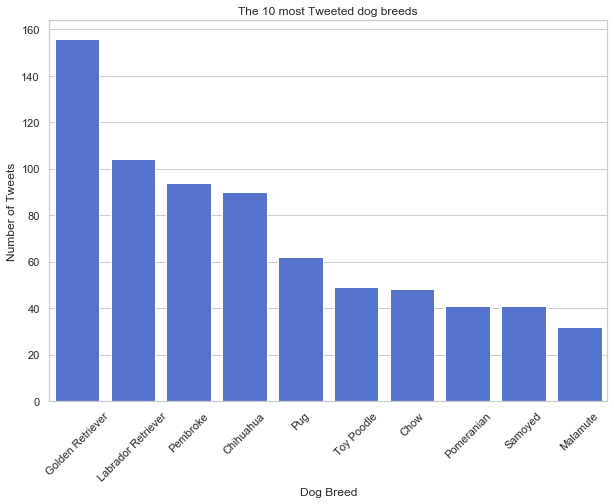

In [2432]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,7))
chart = sns.barplot(x=tweets_by_breed.dog_breed, y=tweets_by_breed.number_of_tweets, orient="v", color="royalblue")
chart.set_ylabel('Number of Tweets')
chart.set_xlabel('Dog Breed')
chart.set_title('The 10 most Tweeted dog breeds')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

> **Analysis:** Golden Retriever is the most Tweeted dog with 155 tweets during the recorded time period of 15th of November, 2015 to 1st of August, 2017. On the bottom of the top 10 we have Malamutes with 32 tweets.  The least Tweeted dog breed, with only one tweet, is shared by 8 breeds, that are Irish Wolfhound, Scotch Terrier, Japanese Spaniel, Bouvier Des Flandres, Standard Schnauzer, Clumber, Silky Terrier and Entlebucher. 

#### (2) The dog that received the most likes

In [2433]:
# Getting the top 10 of dogs that received most likes (favorites) and saving it as subset top_favorite
top_favorite = master_df[['name', 'rating', 'favorites', 'dog_breed', 'retweets', 'jpg_url']].sort_values('favorites', ascending=False).head(10)

In [2434]:
# Displaying the whole subset
top_favorite

,name,rating,favorites,dog_breed,retweets,jpg_url
837,NaN,1.3,154379,Labrador Retriever,76618,https://pbs.twimg.com/ext_tw_video_thumb/74423...
320,NaN,1.3,131641,Lakeland Terrier,43174,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
423,Stephan,1.3,119293,Chihuahua,55850,https://pbs.twimg.com/ext_tw_video_thumb/80710...
110,Jamesy,1.3,115297,French Bulldog,32508,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
872,NaN,1.3,114141,Eskimo Dog,56937,https://pbs.twimg.com/ext_tw_video_thumb/73923...
59,Duddles,1.3,98295,English Springer,40094,https://pbs.twimg.com/ext_tw_video_thumb/87941...
349,Bo,1.4,87244,Standard Poodle,36963,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
138,NaN,1.2,85637,Malamute,28277,https://pbs.twimg.com/ext_tw_video_thumb/85919...
1486,NaN,1.2,78280,Bedlington Terrier,30965,https://pbs.twimg.com/ext_tw_video_thumb/67839...
94,Zoey,1.3,77904,Golden Retriever,24257,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg


In [2435]:
# Double Checking the result
master_df.favorites.max()

154379

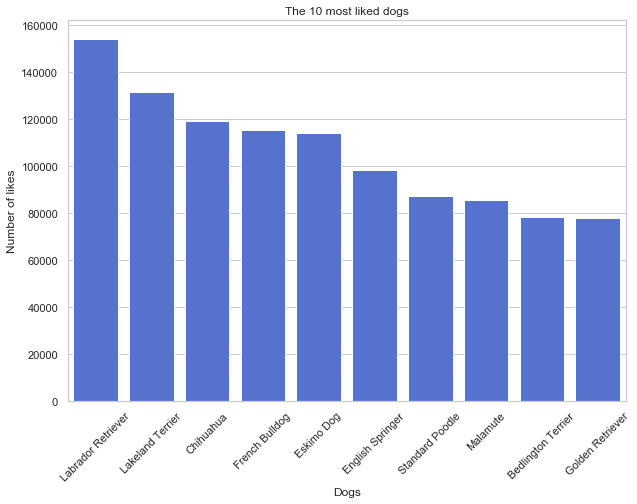

In [2436]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,7))
chart = sns.barplot(x=top_favorite.dog_breed, y=top_favorite.favorites, orient="v", color="royalblue")
chart.set_ylabel('Number of likes')
chart.set_xlabel('Dogs')
chart.set_title('The 10 most liked dogs')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

And the winner is... 

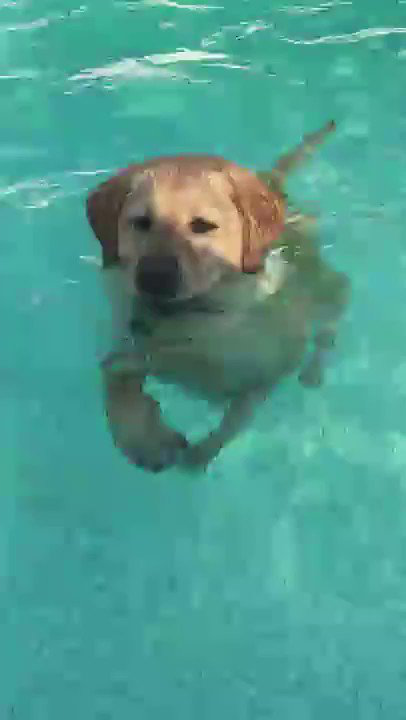

In [2437]:
from PIL import Image
from io import BytesIO

#Getting the Image of the Labrador Retriever who got the most likes
url = top_favorite.jpg_url.iloc[0]
response = requests.get(url)
Image.open(BytesIO(response.content))

**Image1**: The dog, name unfortunately unknown, who received the most likes, and also was the most retweeted dog during the period. 

**Source:** [Towards Data Science](https://towardsdatascience.com/twitter-analytics-weratedogs-a441be7d4a85)

#### (3) The most retweeted dog 

In [2438]:
# Getting the top 10 of dogs that were most retweeted and saving it as subset top_retweet
top_retweet = master_df[['name', 'rating', 'favorites', 'dog_breed', 'retweets', 'jpg_url']].sort_values('retweets', ascending=False).head(10)

In [2439]:
# Displaying the whole subset
top_retweet

,name,rating,favorites,dog_breed,retweets,jpg_url
837,NaN,1.3,154379,Labrador Retriever,76618,https://pbs.twimg.com/ext_tw_video_thumb/74423...
872,NaN,1.3,114141,Eskimo Dog,56937,https://pbs.twimg.com/ext_tw_video_thumb/73923...
423,Stephan,1.3,119293,Chihuahua,55850,https://pbs.twimg.com/ext_tw_video_thumb/80710...
320,NaN,1.3,131641,Lakeland Terrier,43174,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
59,Duddles,1.3,98295,English Springer,40094,https://pbs.twimg.com/ext_tw_video_thumb/87941...
349,Bo,1.4,87244,Standard Poodle,36963,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
426,NaN,1.3,75342,Cocker Spaniel,34925,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg
110,Jamesy,1.3,115297,French Bulldog,32508,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
1486,NaN,1.2,78280,Bedlington Terrier,30965,https://pbs.twimg.com/ext_tw_video_thumb/67839...
1543,Kenneth,1.0,74033,Whippet,29936,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg


In [2440]:
# Double Checking the result
master_df.retweets.max()

76618

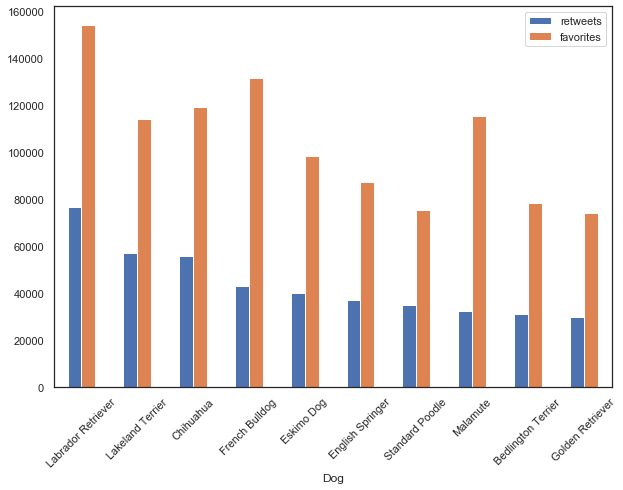

In [2443]:
# Plotting the top 10 of dogs who received the most likes, their corresponding number of tweets, and rating as a comparison.
sns.set(style="white")
ax1 = top_retweet.plot(x='dog_breed', y=['retweets', 'favorites'], kind='bar', figsize=(10,7))
ax1.set_xlabel('Dog')
ax1.set_xticklabels(chart.get_xticklabels(), rotation=45);
plt.show()

> **Analysis:** The photo of the dog who received the most likes, as many as 154379, happens to also be the most retweeted dog during the period. The photo was retweeted 76618 times. We can see in this bar chart that the highest retweets has the highest number of likes, and the lowest retweets have the lowest likes. Lets see in the next chart if there really is a correlation between these data.   

#### (4) Correlation between the variables

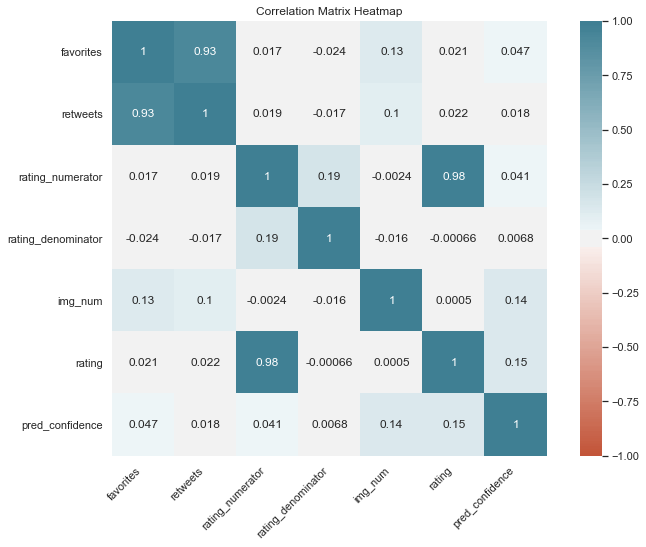

In [2240]:
# Pulling the correlation relationship between the variables in the df dataframe
corr = master_df.corr()
# Creating the correlation matrix heatmap
plt.figure(figsize=(12,8))
ax = sns.heatmap(
    corr, annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_title('Correlation Matrix Heatmap')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

> **Analysis:** It is not a surprise that the same dog received awards of both most liked and most retweeted images. The correlation matrix confirms that the retweets and favorites have the correlation coefficien 0.93 which means that the relationship is positive, and as it is so close to 1, there is a significant meaningful relationship between these variables. Hence, we can say that the more likes there is the more likely the image is to be retweeted, and vice versa.  